### Métodos Numéricos II (2023.1 - T02)
- Aluno: Dario Filipe da Silva Costa
- Matrícula: 422156
- Email: dariocosta@alu.ufc.br

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from IPython.display import display, Latex 

# Tarefa 10: Potência Regular
----
Ao pré multiplica um chute inicial de autovetor muitas vezes pela A o maior autovalor destaca o seu autovetor, e é possível extrair o autovalor com manipulações usando a A e o autovetor obtido, mas para funcionar é necessario que:

>$$\Lambda(A)=\{\lambda_1, \lambda_2, \cdots, \lambda_n\}\text{ seja tal que }\lambda_1>\lambda_2\geq\lambda_3 \geq \cdots \geq \lambda_n$$
> Um autovalor precisa ser maior que os demais (chamado de $\lambda_1$), e portanto também diferente de zero.

In [ ]:
def potReg(A:np.ndarray, v0:np.ndarray, e:float=1e-7, iterMax=1e5, verboseGraph=False) -> tuple[np.ndarray, float]:
  '''
  Supõe v0 um vetor coluna e A uma matriz.

  PARAMETROS:
  - - - - -
  A  : ndarray - Matriz do problema
  v0 : ndarray - Chute inicial do autovetor x_1 (vetor coluna)
  '''
  v=v0.copy()
  lamb = 0

  iter = 0 #Contador de iterações
  if verboseGraph:
    hist={'iter':[], 'lambda_1':[]}
    
  while iter<=iterMax:
    v_old=v.copy()
    lamb_old = lamb
    v_old=(v_old)/((v_old.T@v_old)**0.5)
    v = A@v_old
    lamb = v_old.T@v

    iter+=1
    if verboseGraph:
      hist['iter'].append(iter)
      hist['lambda_1'].append(lamb)
    
    if abs((lamb - lamb_old)/lamb) < e: #Teste de parada
      break
  
  # Trecho apenas para caso o gráfico seja pedido e caso não tenha convergido.
  if verboseGraph:
    plt.plot(hist['iter'], hist['lambda_1'],'o--', label=f'$\\{list(hist.keys())[1]}$')
    plt.title('Estimativa do autovalor dominante')
    plt.grid(); plt.legend(); plt.show()    
  
  if iter > iterMax:
    print("As iterações superaram o máximo estipulado, chance de não ter convergido.")

  return v, lamb

##Testando para as matrizes:

- $A_1 = \left[\begin{array}{c c c}
5 & 2 & 1\\
2 & 3 & 1\\
1 & 1 & 2
\end{array}\right]$

- $A_2 = \left[\begin{array}{c c c c c}
40 & 8 & 4 & 2 & 1 \\
8 & 30 & 12 & 6 & 2\\
4 & 12 & 20 & 1 & 2\\
2 & 6 & 1 & 25 & 4\\
1 & 2 & 2 & 4 & 5
\end{array}\right]$

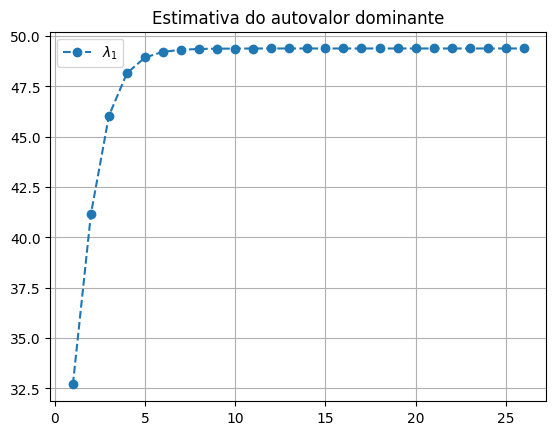

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [ ]:
rnd = lambda x: round(x, 5)
#@markdown Escolha se é a matriz 1 ou 2:
A = "A_1" #@param ["A_1", "A_2"]
if A == "A_1":
  A1 = np.array([
       [5, 2, 1],
       [2, 3, 1], 
       [1, 1, 2]
     ])
  v0_1 = np.array([1, 3, 5])
else:
  A1 =np.array([
      [40, 8, 4, 2, 1],
      [8, 30, 12, 6, 2],
      [4, 12, 20, 1, 2],
      [2, 6, 1, 25, 4],
      [1, 2, 2, 4, 5]
    ])
  v0_1 = np.array([1, 3, 2, 8, 0])

x1, lamb1 = potReg(A1, v0_1.T, e=1e-10, verboseGraph=True)

erro = A1@x1 - lamb1*x1
x1 = list(map(rnd, x1))
display(Latex(f'$x_1={list(x1)}\\\\ \lambda_1={lamb1:.5f}$'))
display(Latex(f'${A}x_1 - \lambda_1 x_1 = {list(map(rnd, erro))}$'))